In [1]:
import bpy
import bmesh

blend_file_path = "single_mesh_network.blend"
bpy.ops.wm.open_mainfile(filepath=blend_file_path)

def draw_network(node_positions, edges, sphere_radius = 4.4):
    # Create a new mesh and object
    mesh = bpy.data.meshes.new("GraphMesh")
    obj = bpy.data.objects.new("GraphObject", mesh)
    bpy.context.collection.objects.link(obj)
    
    # Create a BMesh to add vertices and edges
    bm = bmesh.new()
    bm_verts = []
    for key, co in sorted(node_positions.items()):
        bm_verts.append(bm.verts.new(co))
    
    # Add edges
    for edge in edges:
        v1, v2 = edge
        bm.edges.new((bm_verts[v1], bm_verts[v2]))
    
    # Write the bmesh to the mesh
    bm.to_mesh(mesh)
    
    # Apply the Geometry Nodes modifier
    modifier = obj.modifiers.new(name="GeometryNodes", type='NODES')
    modifier.node_group = bpy.data.node_groups["default_node"]
    
    modifier["Socket_2"] = 2.2
    modifier["Socket_3"] = sphere_radius

Read blend: "/Users/jan-hendrik/projects/ipyblender-gui/single_mesh_network.blend"


In [3]:
import networkx as nx
import bpy

G = nx.balanced_tree(2, 10)
node_positions = nx.spring_layout(G, dim=3, scale=1.9)
edges = list(G.edges)
draw_network(node_positions, edges, sphere_radius = 0.05)

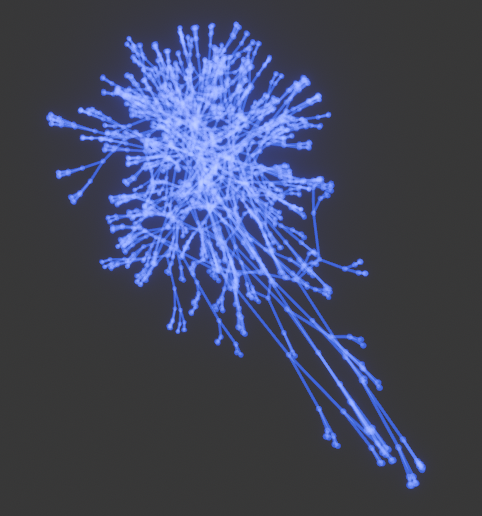

In [9]:
G = nx.balanced_tree(6, 2)
node_positions = nx.spring_layout(G, dim=3, scale=1.9)
edges = list(G.edges)
draw_network(node_positions, edges, sphere_radius = 0.1)